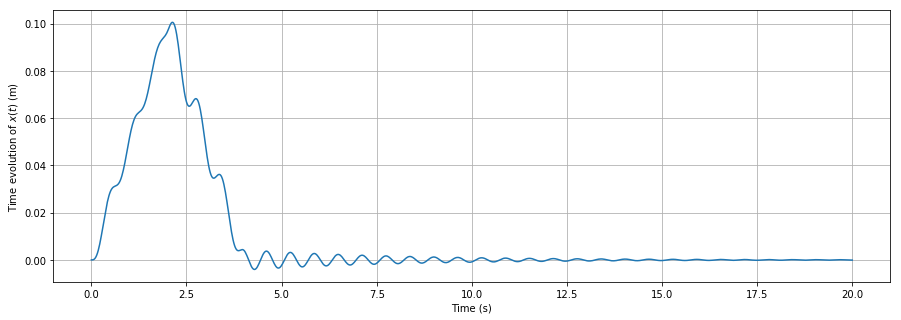

In [1]:
from matplotlib import pyplot as plt
import numpy as np

% matplotlib inline

x0 = 0.0
x0p = 0.0

m = 10.0
c = 5.0
k = 1000.0

wn = np.sqrt(k/m)
xi = c/(2*m*wn)
wd = wn*np.sqrt(1-xi**2)

F0 = 100.

def unit_impulse(t):
    return np.exp(-xi*wn*t)*(1./(m*wd))*np.sin(wd*t)

def force(t):
    t1 = 2.0
    t2 = 4.0
    if t < t1:
        return F0*(t/t1)
    elif (t >= t1)&(t < t2):
        return F0*(t2-t)/t1
    else:
        return 0.

NP = 1000
tf = 20.
t = np.linspace(0,tf,NP, endpoint = True)

x = np.zeros(NP)
h = t[1]-t[0]
for i in range(1,NP):
    for j in range(1,i+1):
        x[i] = x[i] + (force(t[j-1])*unit_impulse(t[i]-t[j-1]) + force(t[j])*unit_impulse(t[i]-t[j]))*h/2
        
x = x + np.exp(-xi*wn*t)*(x0*np.cos(wd*t) + (x0p + xi*wn*x0)*np.sin(wd*t)/wd)

plt.rcParams['figure.figsize'] = 15, 5
plt.plot(t,x)
plt.ylabel(r'Time evolution of $x(t)$ (m)')
plt.xlabel(r'Time (s)')
plt.grid(True)